<a href="https://colab.research.google.com/github/shubh9956/Time-Series/blob/main/Time_series_Analysis_Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing basics libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize']=20,5

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
electricitytimeseries=pd.read_csv('/content/drive/My Drive/AI/Electric_Production.csv', header=0, index_col=0)


In [16]:
electricitytimeseries.head(20)
electricitytimeseries.rename(columns={'IPG2211A2N': 'units'}, inplace=True)

In [17]:
electricitytimeseries.head(20)

,units
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904
7/1/1985,62.6202
8/1/1985,63.2485
9/1/1985,60.5846


**Moving Average Method**

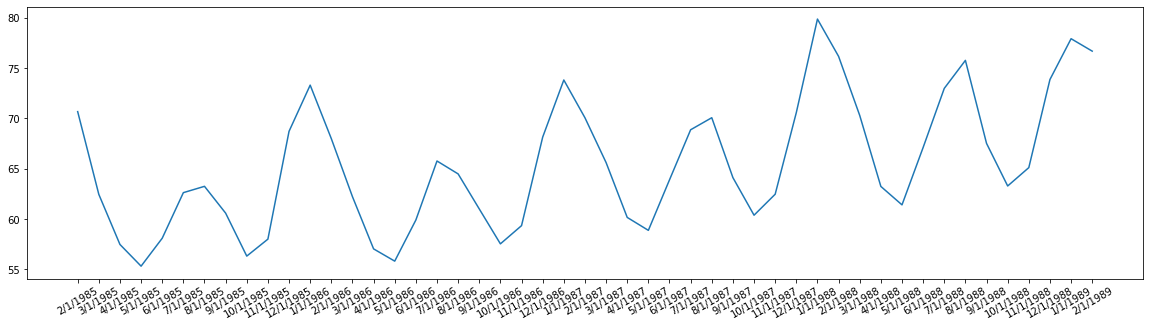

In [18]:
plt.plot(electricitytimeseries[1:50]['units'])
plt.xticks(rotation=30)
plt.show()

In [ ]:
# We can see that there is seasonality in our data another thing is this chart is going up so there is trend also 

In [19]:
#rolling average transforms
rollingseries=electricitytimeseries[1:50].rolling(window=5) # Here i am considering 5 past value 
rollingmean=rollingseries.mean()
print(rollingmean.head(50))

              units
DATE               
2/1/1985        NaN
3/1/1985        NaN
4/1/1985        NaN
5/1/1985        NaN
6/1/1985   60.79982
7/1/1985   59.18946
8/1/1985   59.34912
9/1/1985   59.97176
10/1/1985  60.17182
11/1/1985  60.15384
12/1/1985  61.37270
1/1/1986   63.38414
2/1/1986   64.86460
3/1/1986   66.04594
4/1/1986   65.85242
5/1/1986   63.27226
6/1/1986   60.59122
7/1/1986   60.14694
8/1/1986   60.59884
9/1/1986   61.39236
10/1/1986  61.73606
11/1/1986  61.62430
12/1/1986  62.09828
1/1/1987   63.96500
2/1/1987   65.77730
3/1/1987   67.39286
4/1/1987   67.55624
5/1/1987   65.70384
6/1/1987   63.71916
7/1/1987   63.48064
8/1/1987   64.37202
9/1/1987   65.16332
10/1/1987  65.46442
11/1/1987  65.17892
12/1/1987  65.52058
1/1/1988   67.48126
2/1/1988   69.89068
3/1/1988   71.87346
4/1/1988   72.02828
5/1/1988   70.19404
6/1/1988   67.64192
7/1/1988   67.00580
8/1/1988   68.10034
9/1/1988   68.95570
10/1/1988  69.33104
11/1/1988  68.93066
12/1/1988  69.10696
1/1/1989   69.53762


In [ ]:
# when you print the first 4 value will be blank from the 5th value the value will start coming 

NameError: ignored

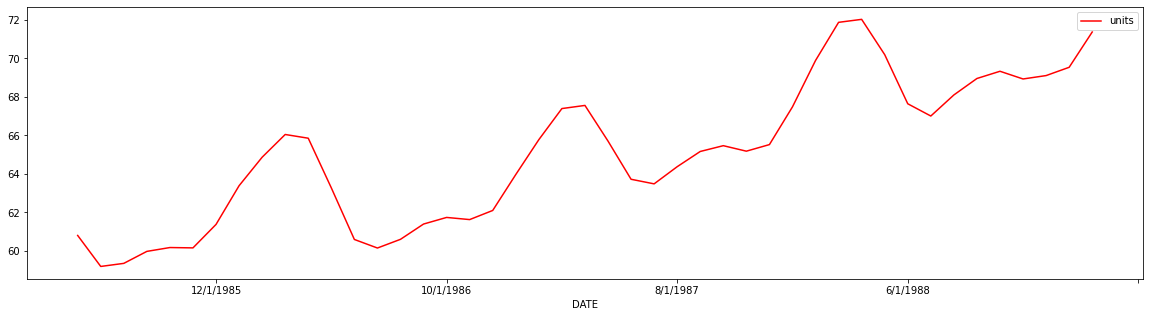

In [21]:
#plot transform dataset
rollingmean.plot(color='red')
pyplot.show()

In [ ]:
The above is most basic technique for doing time series analysis: moving average method let us move ahead

**Simple exponential Smoothing**

In [ ]:
''' If you give more weightage to the most recent observation than your curve will follow your original curve as i have given (a=0.8)  
we can see that the red curve is following the original curve closely

When (a=0.2) means less value to the recent oservation'''

In [22]:
data=electricitytimeseries[1:50]

fit1= SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized= False)

fit2= SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized= False)

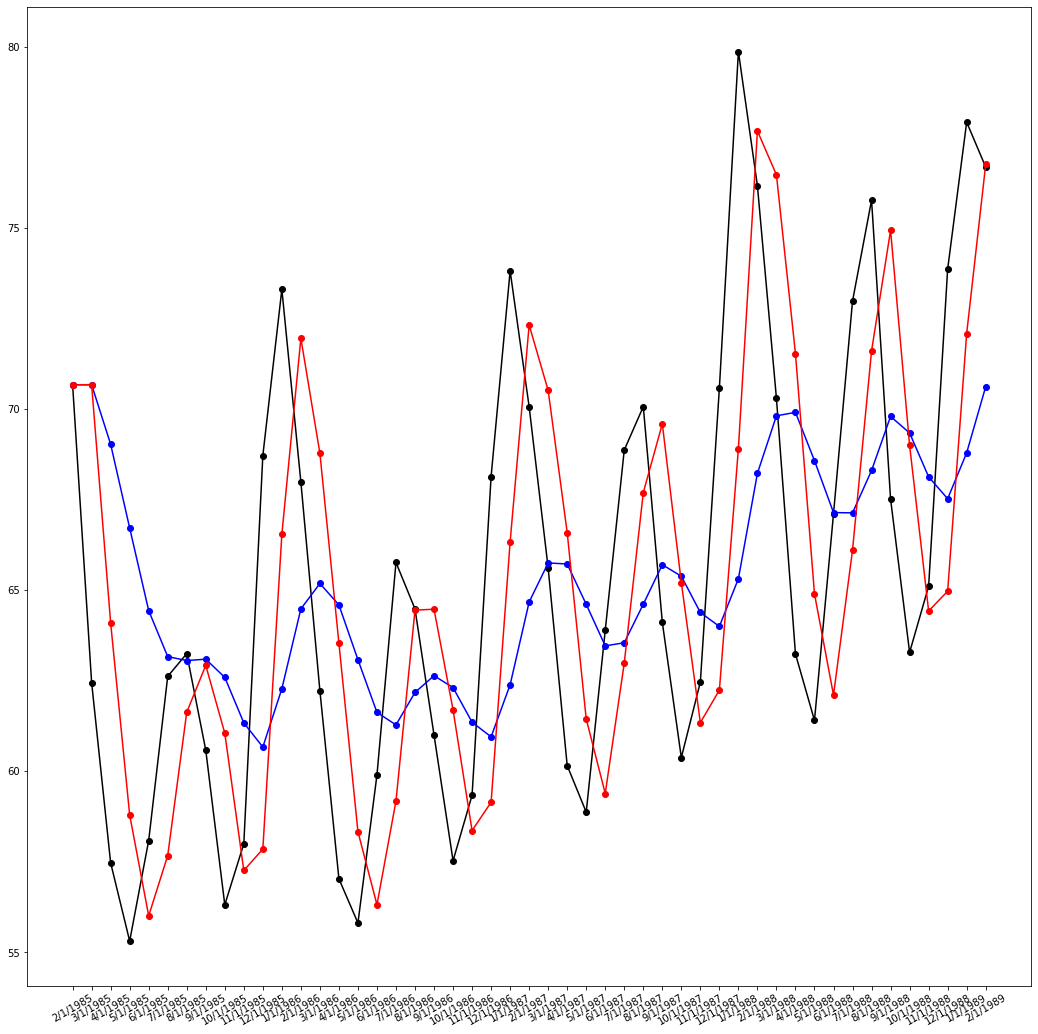

In [23]:
plt.figure(figsize=(18,18))
plt.plot(electricitytimeseries[1:50], marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')


**Holt method for exponential Smoothening**

In [25]:
data=electricitytimeseries[1:50]

In [26]:
fit1=Holt(data).fit()
fit2=Holt(data, exponential=True).fit()


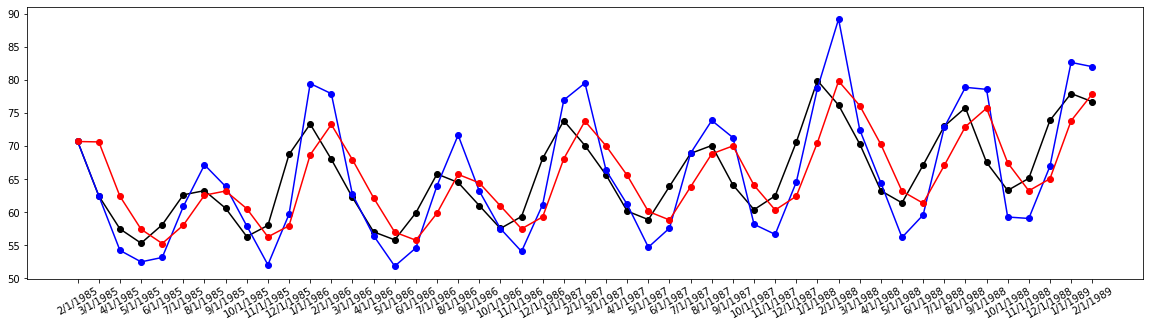

In [27]:
plt.plot(data, marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')